In [1]:
import pandas as pd

# Dataset Source: https://www.kaggle.com/cblesa/world-of-warcraft-battlegrounds#wowbgs2.csv
df = pd.read_csv('wowbgs2.csv')
df.head()

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN


In [2]:
df.isna().sum() #any null values?

Battleground       0
Code               0
Faction            0
Class              0
KB                 0
D                  0
HK                 0
DD                 0
HD                 0
Honor              0
Win             2660
Lose            2723
Rol                0
BE              4429
dtype: int64

In [3]:
df.shape

(5383, 14)

In [4]:
df = df.fillna(0) #according to the source, NaN/null values are equivilent to a binary NO

In [5]:
df.isna().sum()

Battleground    0
Code            0
Faction         0
Class           0
KB              0
D               0
HK              0
DD              0
HD              0
Honor           0
Win             0
Lose            0
Rol             0
BE              0
dtype: int64

In [6]:
import numpy as np

# Convert Faction to binary data: 0 for Horde, 1 for Alliance
df.Faction = np.where(df.Faction == "Horde", 0, 1)

# Convert Role to binary data: 0 for dps, 1 for healers
df.Rol = np.where(df.Rol == "dps", 0, 1)

In [7]:
df.dtypes

Battleground     object
Code             object
Faction           int64
Class            object
KB                int64
D                 int64
HK                int64
DD                int64
HD                int64
Honor             int64
Win             float64
Lose            float64
Rol               int64
BE              float64
dtype: object

In [8]:
# Drop Code column, as we don't need to analyze this data. See source for more information
df.drop('Code', axis=1, inplace=True)

# Also drop 'Lose' column because this now duplicates data from 'Win' column
df.drop('Lose', axis=1, inplace=True)

In [9]:
# Create 2 subsets, one for classfication by Battleground, and anoher for individual Classes
battlegrounds = df.drop('Class', axis=1)
classes = df.drop('Battleground', axis=1)

In [10]:
# Hot-encode Battleground and Class columns respectively for each subset
battlegrounds = pd.get_dummies(battlegrounds, columns=['Battleground'])
classes = pd.get_dummies(classes, columns=['Class'])

In [11]:
battlegrounds.head()

,Faction,KB,D,HK,DD,HD,Honor,Win,Rol,BE,Battleground_AB,Battleground_BG,Battleground_DG,Battleground_ES,Battleground_SA,Battleground_SM,Battleground_SS,Battleground_TK,Battleground_TP,Battleground_WG
0,0,1,3,14,48155,6641,532,1.0,0,0.0,0,0,0,0,0,0,0,0,0,1
1,0,1,3,12,27025,7106,377,1.0,0,0.0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,19,824,93879,252,0.0,1,0.0,0,0,0,0,0,0,0,0,0,1
3,1,1,2,25,7046,98599,274,0.0,1,0.0,0,0,0,0,0,0,0,0,0,1
4,1,2,3,23,65483,19629,268,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1


In [12]:
battlegrounds.dtypes

Faction              int64
KB                   int64
D                    int64
HK                   int64
DD                   int64
HD                   int64
Honor                int64
Win                float64
Rol                  int64
BE                 float64
Battleground_AB      uint8
Battleground_BG      uint8
Battleground_DG      uint8
Battleground_ES      uint8
Battleground_SA      uint8
Battleground_SM      uint8
Battleground_SS      uint8
Battleground_TK      uint8
Battleground_TP      uint8
Battleground_WG      uint8
dtype: object

In [13]:
classes.head()

,Faction,KB,D,HK,DD,HD,Honor,Win,Rol,BE,...,Class_Druid,Class_Hunter,Class_Mage,Class_Monk,Class_Paladin,Class_Priest,Class_Rogue,Class_Shaman,Class_Warlock,Class_Warrior
0,0,1,3,14,48155,6641,532,1.0,0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,3,12,27025,7106,377,1.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,19,824,93879,252,0.0,1,0.0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,2,25,7046,98599,274,0.0,1,0.0,...,0,0,0,0,1,0,0,0,0,0
4,1,2,3,23,65483,19629,268,0.0,0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
classes.dtypes

Faction                 int64
KB                      int64
D                       int64
HK                      int64
DD                      int64
HD                      int64
Honor                   int64
Win                   float64
Rol                     int64
BE                    float64
Class_Death Knight      uint8
Class_Demon Hunter      uint8
Class_Druid             uint8
Class_Hunter            uint8
Class_Mage              uint8
Class_Monk              uint8
Class_Paladin           uint8
Class_Priest            uint8
Class_Rogue             uint8
Class_Shaman            uint8
Class_Warlock           uint8
Class_Warrior           uint8
dtype: object

In [15]:
from sklearn.cluster import KMeans

# Cluster the Battlegrounds-subset data with KMeans
kmeans = KMeans(n_clusters=4) #create 4 clusters
bg_clusters = kmeans.fit(battlegrounds)
battlegrounds['labels'] = bg_clusters.labels_
battlegrounds.labels.value_counts()

0    3133
1    1347
3     629
2     274
Name: labels, dtype: int64

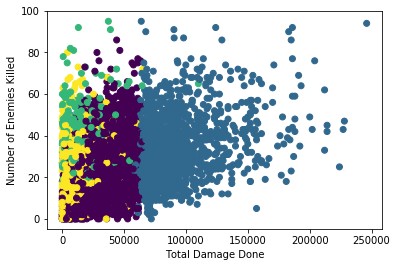

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(battlegrounds['DD'], battlegrounds['HK'], c=battlegrounds['labels'])
plt.xlabel("Total Damage Done")
plt.ylabel("Number of Enemies Killed")
plt.show()

In [17]:
# Cluster the Classes-subset data with KMeans
kmeans = KMeans(n_clusters=8) #create 8 clusters
classes_clusters = kmeans.fit(classes)
classes['labels'] = classes_clusters.labels_
classes.labels.value_counts()

0    1444
2    1264
6    1080
7     535
5     471
1     337
4     139
3     113
Name: labels, dtype: int64

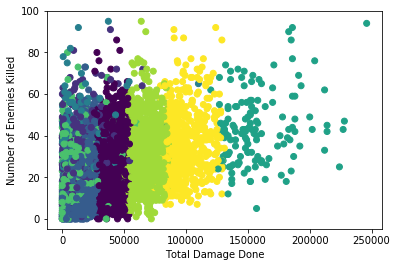

In [18]:
plt.scatter(classes['DD'], classes['HK'], c=classes['labels'])
plt.xlabel("Total Damage Done")
plt.ylabel("Number of Enemies Killed")
plt.show()

In [19]:
## Look at clusters just for Shaman
bg_shaman = battlegrounds.copy()
bg_shaman['Class'] = df['Class']
bg_shaman = bg_shaman[bg_shaman.Class == "Shaman"]
bg_shaman.head()

,Faction,KB,D,HK,DD,HD,Honor,Win,Rol,BE,...,Battleground_DG,Battleground_ES,Battleground_SA,Battleground_SM,Battleground_SS,Battleground_TK,Battleground_TP,Battleground_WG,labels,Class
6,0,0,4,18,12933,94587,541,1.0,1,0.0,...,0,0,0,0,0,0,0,1,3,Shaman
18,0,1,3,15,43666,17475,383,1.0,0,0.0,...,0,0,0,0,0,0,0,1,0,Shaman
28,0,0,4,19,3445,43063,141,0.0,1,0.0,...,0,0,0,0,0,0,0,1,3,Shaman
46,0,0,6,8,4663,75063,134,0.0,1,0.0,...,0,0,0,0,0,0,0,1,3,Shaman
47,1,7,2,29,70816,7654,789,1.0,0,0.0,...,0,0,0,0,0,0,0,1,1,Shaman


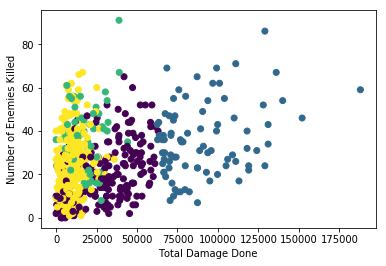

In [20]:
plt.scatter(bg_shaman['DD'], bg_shaman['HK'], c=bg_shaman['labels'])
plt.xlabel("Total Damage Done")
plt.ylabel("Number of Enemies Killed")
plt.show()

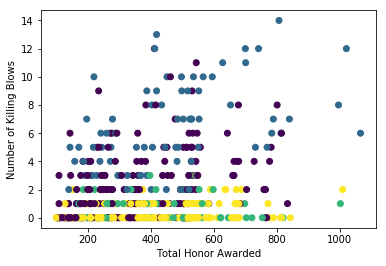

In [21]:
plt.scatter(bg_shaman['Honor'], bg_shaman['KB'], c=bg_shaman['labels'])
plt.xlabel("Total Honor Awarded")
plt.ylabel("Number of Killing Blows")
plt.show()